In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from thinning import sample_hawkes_process_thinning, sample_hawkes_process_thinning_vectorised, sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel, constant_background, plot_counting_process, exp_kernel_vectorised
from time_rescaling import rescale_times
from clustering import simulate_homogeneous_poisson_process, simulate_inhomogeneous_poisson_process, simulate_immigrants, simulate_offspring, produce_cluster, sample_hawkes_process_clustering, cluster_plot

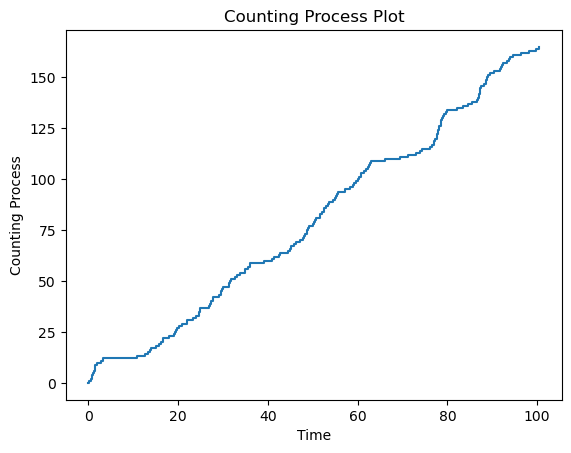

165


In [4]:
hawkes_realisation = sample_hawkes_process_thinning(100, constant_background, exp_kernel)
plot_counting_process(hawkes_realisation)
print(len(hawkes_realisation))

In [9]:
taus_list = rescale_times(hawkes_realisation)

z_list = [(1 - np.exp(-tau)) for tau in taus_list]

c:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\utils.py:40: RuntimeWarning: overflow encountered in exp
  return np.where(t < 0, 0, alpha * np.exp(-delta * t))


(array([0.70539213, 0.78837944, 0.71230774, 0.89902918, 1.03042576,
        1.01659454, 1.11341307, 1.1410755 , 1.25864086, 1.34162817]),
 array([0.        , 0.09993118, 0.19986237, 0.29979355, 0.39972473,
        0.49965592, 0.5995871 , 0.69951829, 0.79944947, 0.89938065,
        0.99931184]),
 <BarContainer object of 10 artists>)

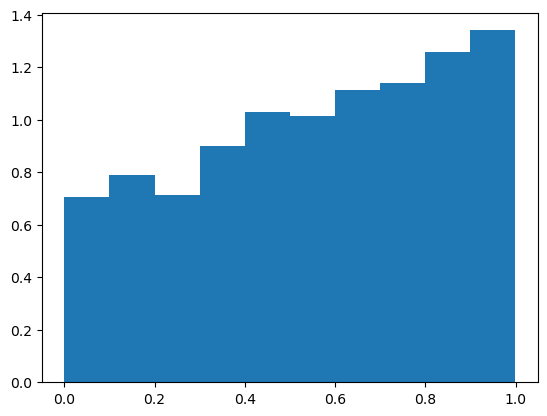

In [10]:
plt.hist(z_list, bins=10, density=True)

This is probably wrong

In [4]:
num_samples = 1000
max_T=100
for i in range(num_samples):
    T_list = simulate_homogeneous_poisson_process(10, max_T)
    if i==0:
        lambda_bar = len(T_list)/max_T
        # print(len(T_list), lambda_bar)
    else:
        lambda_bar += len(T_list)/max_T
        lambda_bar /= 2
print(lambda_bar)

9.859517175333846


~~Think there is issue with simulating homogeneous poisson process, since not getting right expected number of events.~~

Fixed it! NumPy generates Exponential rvs with scale parameter which is equal to $1/\lambda$, instead of with $\lambda$ directly.

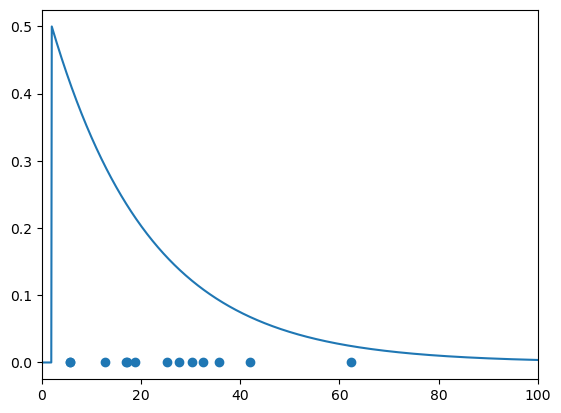

In [5]:
s = 2
rate = lambda t: exp_kernel(t-s, alpha=0.5, delta=0.05)
# rate = lambda t: exp_kernel(t)

T_list = simulate_inhomogeneous_poisson_process(rate, 100, s)

plt.scatter(T_list, len(T_list)*[0])
x_points = np.linspace(0, 100, 1000)
plt.plot(x_points, [rate(x) for x in x_points])
plt.xlim(0, 100)
plt.show()

In [6]:
num_samples = 10000
num_events = np.zeros(num_samples)
alpha=1
delta=10
rate = lambda t: exp_kernel(t-20, alpha=alpha, delta=delta)
for i in range(num_samples):    

    T_list = simulate_inhomogeneous_poisson_process(rate, 100, 20)

    num_events[i] = len(T_list)
print(np.mean(num_events))
print(alpha/delta)

0.1035
0.1


This is great! Expected number of offspring from one immigrant should be $\alpha / \delta$ (this is the branching factor $n^*$), which here is equal to 10 (not anymore, as played around with different values).

Next add clustering code.

In [7]:
values = np.zeros(num_samples)
for i in range(num_samples):
    values[i] = len(simulate_immigrants(10))
np.mean(values)

10.0038

This seems to be working correctly.

In [9]:
values = np.zeros(num_samples)
for i in range(num_samples):
    values[i] = len(simulate_offspring(1, 5))
np.mean(values)

0.4918

As does this, but could think about an early stopping criterion rather than simulating all the way until max_T.

In [11]:
values = np.zeros(num_samples)
for i in range(num_samples):
    cluster = produce_cluster(2, 100)
    values[i] = sum(len(lst) for lst in cluster.values())
np.mean(values)

2.0017

Get average size of a single cluster is 2, which is as expected ($=\frac{1}{1-\frac{1}{2}})$

220


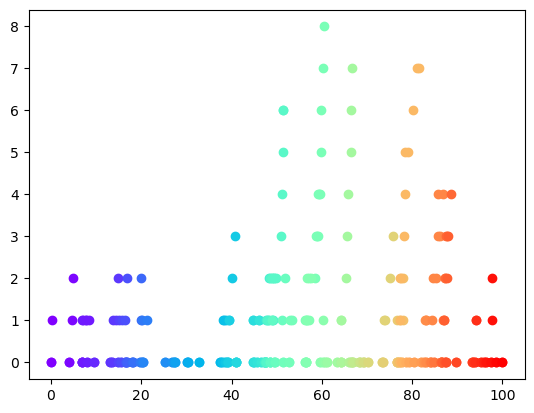

In [28]:
clusters = sample_hawkes_process_clustering(100)
cluster_plot(clusters)

In [29]:
sum = 0
for cluster in clusters.values():
    for lst in cluster.values():
        sum += len(lst)
print(sum)

220


In [31]:
# Checking thinning
num_samples=1000

values = np.zeros(num_samples)
for i in range(num_samples):
    realisation = sample_hawkes_process_thinning(100, constant_background, exp_kernel)
    values[i] = len(realisation)
print(np.mean(values))

150.131


In [32]:
# Checking clustering
num_samples=1000

values = np.zeros(num_samples)
for i in range(num_samples):
    realisation = sample_hawkes_process_clustering(100)
    values[i] = len(realisation)
print(np.mean(values))

99.863


In [3]:
from utils import conditional_intensity, conditional_intensity_vectorised, conditional_intensity_true_vectorised
import time

In [4]:
T_list = [1,2,2.4]

In [5]:
t1 = time.time()
print(conditional_intensity(2, T_list, exp_kernel_vectorised, constant_background))
t2 = time.time()
print(conditional_intensity_vectorised(2.0, T_list, exp_kernel_vectorised, constant_background))
t3 = time.time()
print(conditional_intensity_true_vectorised(np.array([2]), T_list, exp_kernel_vectorised, constant_background))
t4 = time.time()

print(t2-t1, t3-t2, t4-t3)

1.0183156388887342
1.0183156388887342
[[1. ]
 [2. ]
 [2.4]]
[[2]]
[[ 1. ]
 [ 0. ]
 [-0.4]]
[[ 1.]
 [ 0.]
 [nan]]
1
1
0.01831563888873418
1.0183156388887342
0.0 0.0 0.0


In [6]:
t_vals = np.linspace(0,10, 1000)

In [7]:
cond_intensity = conditional_intensity_true_vectorised(t_vals, T_list, exp_kernel_vectorised, constant_background)

[[1. ]
 [2. ]
 [2.4]]
[[ 0.          0.01001001  0.02002002  0.03003003  0.04004004  0.05005005
   0.06006006  0.07007007  0.08008008  0.09009009  0.1001001   0.11011011
   0.12012012  0.13013013  0.14014014  0.15015015  0.16016016  0.17017017
   0.18018018  0.19019019  0.2002002   0.21021021  0.22022022  0.23023023
   0.24024024  0.25025025  0.26026026  0.27027027  0.28028028  0.29029029
   0.3003003   0.31031031  0.32032032  0.33033033  0.34034034  0.35035035
   0.36036036  0.37037037  0.38038038  0.39039039  0.4004004   0.41041041
   0.42042042  0.43043043  0.44044044  0.45045045  0.46046046  0.47047047
   0.48048048  0.49049049  0.5005005   0.51051051  0.52052052  0.53053053
   0.54054054  0.55055055  0.56056056  0.57057057  0.58058058  0.59059059
   0.6006006   0.61061061  0.62062062  0.63063063  0.64064064  0.65065065
   0.66066066  0.67067067  0.68068068  0.69069069  0.7007007   0.71071071
   0.72072072  0.73073073  0.74074074  0.75075075  0.76076076  0.77077077
   0.78078078  0

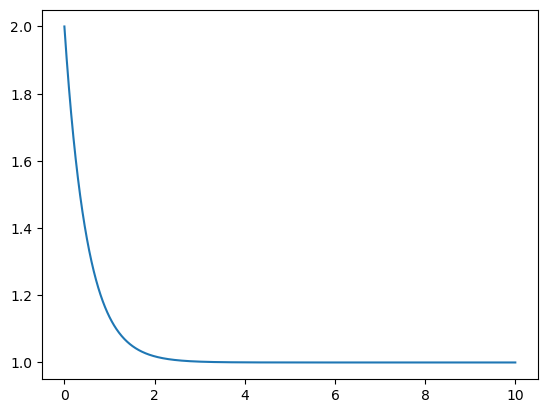

In [8]:
plt.plot(t_vals, cond_intensity)

In [9]:
# t_vals = np.array([1,2])
t_vals = np.linspace(0,10,100)
events_list = [1,2,3]

cond_intensity = conditional_intensity_true_vectorised(np.array(t_vals), events_list, constant_background, exp_kernel_vectorised)

[[1]
 [2]
 [3]]
[[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
   0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
   1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
   1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
   2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
   3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
   3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
   4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
   4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
   5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
   6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
   6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
   7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
   7.87878788  7.97979

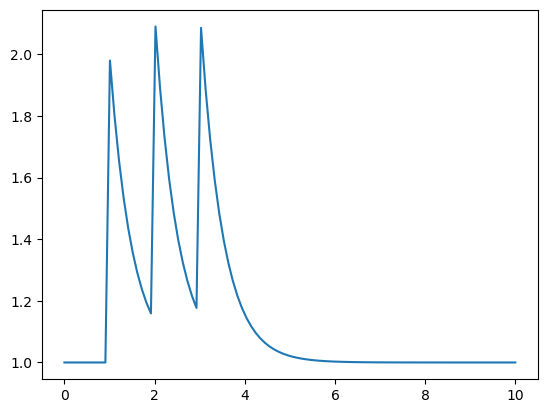

In [10]:
plt.plot(t_vals, cond_intensity)